In [1]:

import numpy as np
import matplotlib.pyplot as plt

import funciones as fn
from funciones import *

In [2]:
# Unidades en nanómetros

n1 = 1.0
n2 = 1.5
n3 = 1.0
d = 100.0
wavel = 440


theta1 = np.pi/180 * 15

theta2 = fn.snell_law(n1, n2, theta1)

theta3 = fn.snell_law(n2, n3, theta2)

D1 = fn.inter(n1, theta1)
D2 = fn.inter(n2, theta2)
D3 = fn.inter(n3, theta3)

D1inv = np.linalg.inv(D1)
D2inv = np.linalg.inv(D2)

P2 = fn.prop(theta2, d, n2, wavel)

dtot = D1inv @ D2 @ P2 @ D2inv @ D3

t = 1/dtot[0,0]
r = dtot[1,0]/dtot[0,0]

ta, ra = fn.coef_monocapa(n1, n2, n3, d, theta1, theta2, theta3, wavel)

print(f't = {np.round(t,3)},  r = {np.round(r,3)}, \n ta = {np.round(ta, 3)}, ra = {np.round(ra,3)} ')

T, R = fn.coef_TR(t,r, theta1, theta3,  n1, n3)
Ta, Ra = fn.coef_TR(ta,ra, theta1, theta3,  n1, n3)


print(T, R)
print(Ta, Ra)

t = (-0.45-0.821j),  r = (-0.309+0.169j), 
 ta = (-0.45-0.821j), ra = (-0.309+0.169j) 
0.8762346717954737 0.12376532820452633
0.8762346717954739 0.12376532820452633


In [3]:
n0 = 1.0

n1 = 1.2
n2 = 1.8

d1 = 80
d2 = 120
d3 = 80
d4 = 120

wavel = 440

n = [n0, n1, n2, n1, n2, n0]
d = [0, d1, d2, d3, d4, 0]

theta0 = np.pi/180 * 15
theta = [theta0]
D = [fn.inter(n0, theta0)]
Dinv = [np.linalg.inv(D[0])]
P = [0]
dtot = Dinv[0]

for i in range(len(n)-1):
    theta.append(fn.snell_law(n[i], n[i+1], theta[-1]))

    D = fn.inter(n[i+1], theta[i+1])
    Dinv =np.linalg.inv(D)
    P = fn.prop(theta[i+1], d[i+1], n[i+1], wavel)
    dtot = dtot @ D @ P @ Dinv


D = fn.inter(n0, theta[-1])

dtot = dtot @ D

t = 1/dtot[0,0]
r = dtot[1,0]/dtot[0,0]


print(f't = {np.round(t,3)},  r = {np.round(r,3)}')

T, R = fn.coef_TR(t,r, theta0, theta[-1],  n0, n0)

print(T, R)
print(T+R)

t = (-0.78-0.615j),  r = (-0.089+0.074j)
0.9867574622178478 0.013242537782153379
1.000000000000001


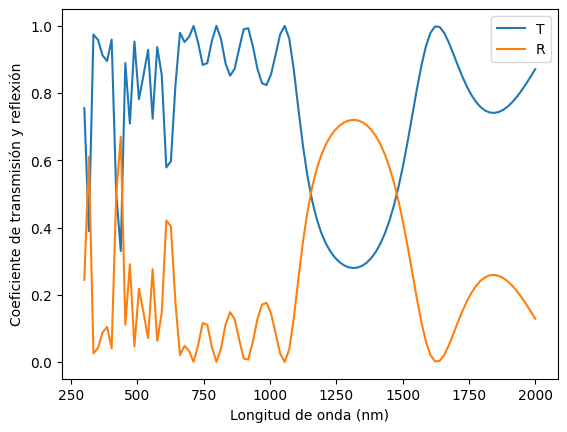

0.8712430009403449


In [4]:
n1 = 1.4
n2 = 1.8
d1 = 200
d2 = 200

wavelens = np.linspace(300,2000, 100)

T = []
R = []

for wavel in wavelens:
    t, r = multicapaperiodo(5, n0, n1, n2, d1, d2, wavel)
    T.append(t)
    R.append(r)

plt.plot(wavelens, T, label = 'T')
plt.plot(wavelens, R, label = 'R')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Coeficiente de transmisión y reflexión')
plt.legend()
plt.show()

print(T[-1])

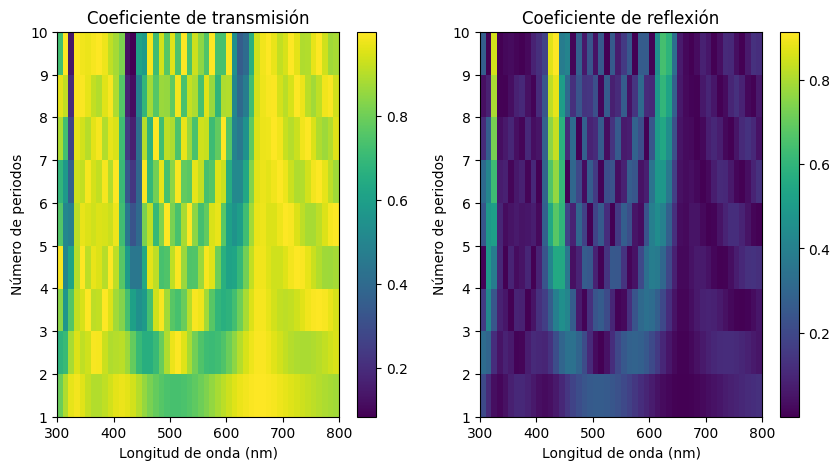

In [5]:
maxperiods = 10

nperiods = np.arange(1, maxperiods, 1)
wavelens = np.linspace(300,800, 50)

Ts = []
Rs = []
for n in nperiods:
    T = []
    R = []
    for wavel in wavelens:
        t, r = multicapaperiodo(n, n0, n1, n2, d1, d2, wavel)
        T.append(t)
        R.append(r)
    Ts.append(T)
    Rs.append(R)

Ts = np.array(Ts[::-1])
Rs = np.array(Rs[::-1])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(Ts, extent = [300, 800, 1, maxperiods], aspect = 'auto')
plt.colorbar()
plt.title('Coeficiente de transmisión')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Número de periodos')

plt.subplot(1,2,2)
plt.imshow(Rs, extent = [300, 800, 1, maxperiods], aspect = 'auto')
plt.colorbar()
plt.title('Coeficiente de reflexión')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Número de periodos')

plt.show()

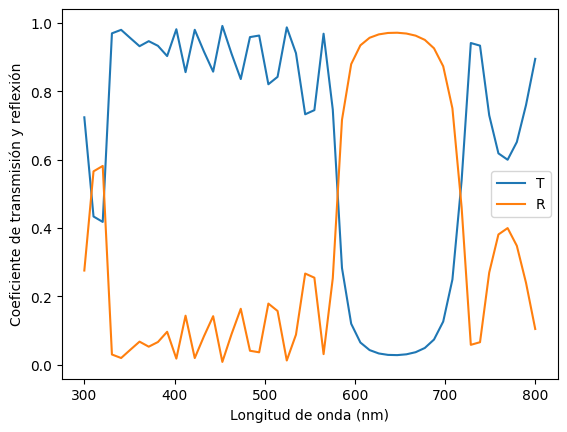

In [6]:
T = []
R = []

d1 = 100
d2 = 100

for wavel in wavelens:
    t, r = multicapaperiodo(10, n0, n1, n2, d1, d2, wavel)
    T.append(t)
    R.append(r)

plt.plot(wavelens, T, label = 'T')
plt.plot(wavelens, R, label = 'R')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Coeficiente de transmisión y reflexión')
plt.legend()
plt.show()


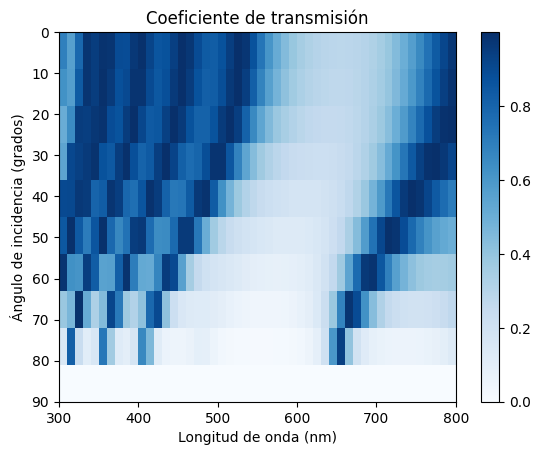

In [12]:
theta = np.linspace(0, np.pi/2, 10)

T = []
R = []


for te in theta:
    for wavel in wavelens:
        t, r = multicapaperiodo(5, n0, n1, n2, d1, d2, wavel, te)
        T.append(t)
        R.append(r)

T = np.array(T).reshape(len(theta), len(wavelens))

plt.imshow(T, extent = [300, 800, 90, 0], aspect = 'auto', cmap='Blues')
plt.colorbar()
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Ángulo de incidencia (grados)')
plt.title('Coeficiente de transmisión')
plt.show()

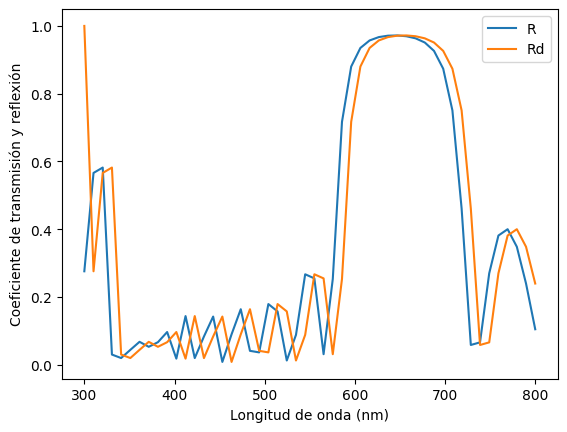

In [8]:
d1 = 100
d2 = 100
d3 = 100

Td = []
Rd = []
T = []
R = []


for wavel in wavelens:
    td, rd = multicapaDefecto(10, n0, n1, n2, n3, d1, d2, d3, wavel)
    Td.append(t)
    Rd.append(r)
    t, r = multicapaperiodo(10, n0, n1, n2, d1, d2, wavel)
    T.append(t)
    R.append(r)

plt.plot(wavelens, R, label = 'R')
plt.plot(wavelens, Rd, label = 'Rd')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Coeficiente de transmisión y reflexión')
plt.legend()
plt.show()

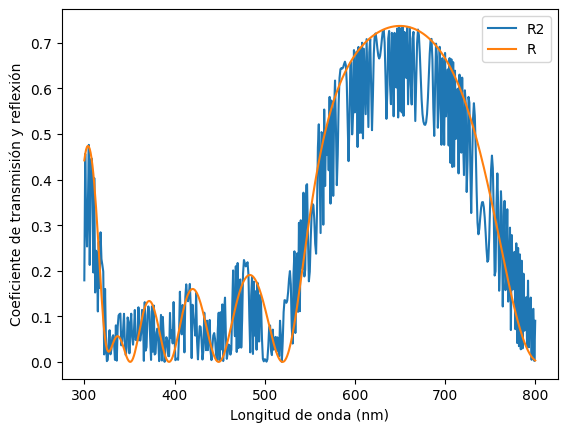

In [19]:
wavelens = np.linspace(300,800, 501)
n = [1] + [n1, n2] * 5 + [n1] + [1]
d = [0] + [d1, d2] * 5 + [0] + [0]
nn = [1] + [n1, n2] * 5 + [n1] + [1]
dd = [0] + [d1, d2] * 5 + [1E6] + [0]


T = []
R = []
T2 = []
R2 = []
for wavel in wavelens:
    t, r = multicapa(n, d, wavel)
    T.append(t)
    R.append(r)
    t2, r2 = multicapa(nn, dd, wavel)
    T2.append(t2)
    R2.append(r2)


plt.plot(wavelens, R2, label = 'R2')
plt.plot(wavelens, R, label = 'R')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Coeficiente de transmisión y reflexión')
plt.legend()
plt.show()